In [1]:
# Call python libraries 
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Choose department for detailed information
chkdept = "DEPARTMENT OF HUMAN RESOURCES"

In [3]:
# Set the output for float numbers to display as currency
pd.options.display.float_format = '${:,.2f}'.format

In [4]:
# Read the contents of a local copy of the Checkbook (read in as chunks)
csv_file='State_of_Delaware_Checkbook.csv'
chunksize = 5000
chunks = []
for chunk in pd.read_csv(csv_file, chunksize=chunksize):
    chunks.append(chunk)

In [5]:
# Concatenate chunks as pandas dataframe
data = pd.concat(chunks, axis=0)

In [6]:
# count rows and columns
data.shape

(8878941, 10)

In [7]:
# Show data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878941 entries, 0 to 8878940
Data columns (total 10 columns):
FISCAL YEAR      int64
FISCAL PERIOD    int64
DEPARTMENT       object
DIVISION         object
VENDOR           object
CATEGORY         object
FUND_TYPE        object
CHECK_NUMBER     object
CHECK_DATE       object
AMOUNT           float64
dtypes: float64(1), int64(2), object(7)
memory usage: 677.4+ MB


In [8]:
# Ten random records from the recordset
data.sample(10)

,FISCAL YEAR,FISCAL PERIOD,DEPARTMENT,DIVISION,VENDOR,CATEGORY,FUND_TYPE,CHECK_NUMBER,CHECK_DATE,AMOUNT
8577014,2019,6,DEPT OF NATRL RES AND ENV CONT,WATER,OMB BUDGET ADMINISTRATION,INDIRECT COST,FEDERAL,Z0008186209,12/06/2018,$561.54
5598110,2017,6,DEPT OF EDUCATION,COLONIAL SCHOOL DISTRICT,GREENBERG SUPPLY CO INC,EQUIPMENT SUPP & MAINT MAT,SPECIAL,1235458,12/27/2016,$403.31
575368,2014,10,DEPT OF EDUCATION,SEAFORD SCHOOL DISTRICT,DELMARVA POWER,ENERGY,GENERAL,776491,04/29/2014,"$3,527.47"
6671249,2018,2,DEPT OF HEALTH & SOCIAL SVS,FACILITY OPERATIONS,PEIRCE PHELPS INC,EQUIPMENT SUPP & MAINT MAT,GENERAL,0001330478,08/17/2017,$77.20
7407775,2019,9,DEPT OF EDUCATION CONTINUED,FIRST STATE MILITARY ACADEMY,EMPLOYEE COMPENSATION,FOOD SERVICE GENERAL WORKERS,GENERAL,PAYROLL,03/15/2019,"$1,033.19"
454918,2014,4,DEPT OF EDUCATION,CAPE HENLOPEN SCHOOL DISTRICT,EDWARD ZYGMONSKI,OFFICE SUPPLIES,SPECIAL,265083,10/10/2013,$10.19
473595,2014,6,DEPT OF EDUCATION,INDIAN RIVER SCHOOL DISTRICT,INSIGHT PUBLIC SECTOR,COMPUTER SUPPLIES,SPECIAL,280360,12/05/2013,$1.00
2539390,2015,6,DEPT OF EDUCATION,SEAFORD SCHOOL DISTRICT,VERIZON - DELAWARE,TELECOMMUNICATION,GENERAL,388001,12/16/2014,$452.54
4340910,2016,2,DEPT OF EDUCATION,INDIAN RIVER SCHOOL DISTRICT,EMPLOYEE COMPENSATION,OVERTIME SALARIES,GENERAL,PAYROLL,08/21/2015,$931.50
6660113,2018,7,DEPT OF EDUCATION CONTINUED,FREIRE CHARTER SCHOOL,OTHER EMPLOYMENT COSTS BENEFITS,UNEMPLOYMENT INS BENEFITS,GENERAL,PAYROLL,01/05/2018,$60.77


In [9]:
# Show a list of the unique CATEGORY field values with 2019 totals sorted by amount decending
cat = data[data['FISCAL YEAR']==2019]
cat = cat.groupby(['CATEGORY'])['AMOUNT'].sum().reset_index()
cat = cat.sort_values('AMOUNT', ascending=False)
print(cat.to_string())

                           CATEGORY            AMOUNT
229                 MEDFAC EXPENSES $2,229,168,840.21
231              MEDICAL - EMPLOYER   $943,425,963.04
333        SALARIES/WAGES-EMPLOYEES   $765,760,837.45
381                        TEACHERS   $671,461,068.15
277       PENSIONS/EMPLOYER'S SHARE   $512,573,226.68
261      OTHER PROFESSIONAL SERVICE   $479,224,347.35
175        HEALTH INS/EMPLOYERS' SH   $461,328,836.23
201                     INVESTMENTS   $335,482,427.59
168                          GRANTS   $245,590,372.01
179            HGWY/BRIDGE RECONSTR   $243,926,934.62
232                MEDICAL SERVICES   $219,111,278.73
62                      CONSULTANTS   $191,163,707.26
170                   GRANTS IN AID   $145,998,777.75
125       EMPLYR SH/SOCIAL SECURITY   $127,634,991.84
61   CONSTRUCTION/BUILDING SERVICES   $124,493,875.78
132                EQUIPMENT RENTAL   $123,184,792.39
392                    TRANSFER OUT   $120,933,754.77
30          BUILDING/GROUNDS

In [10]:
# Show a list of the unique FUND_TYPE field values with 2019 totals sorted by amount decending
cat = data[data['FISCAL YEAR']==2019]
cat = cat.groupby(['FUND_TYPE'])['AMOUNT'].sum().reset_index()
cat = cat.sort_values('AMOUNT', ascending=False)
print(cat.to_string())

  FUND_TYPE            AMOUNT
2   GENERAL $4,670,816,526.20
3   SPECIAL $3,172,030,199.72
1   FEDERAL $1,993,620,701.14
0   CAPITAL   $888,184,395.11


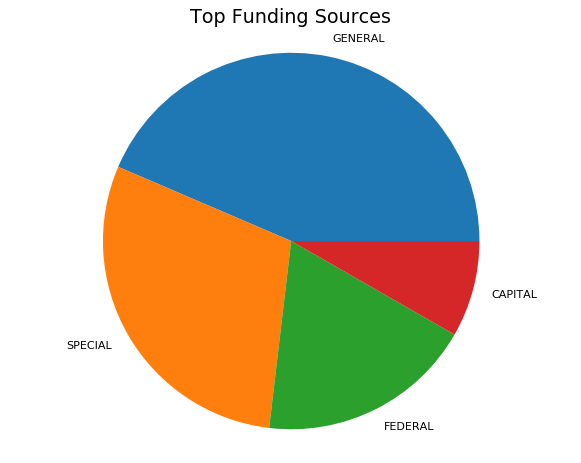

In [11]:
figure(num=None, figsize=(9, 7), dpi=80)

# Data to plot
labels = cat['FUND_TYPE'].head(10)
sizes = cat['AMOUNT'].head(10)
 
# Plot
plt.title('Top Funding Sources',size='xx-large')
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()

In [12]:
# Show a list of the unique DEPARTMENT field values with 2019 totals
dep = data[data['FISCAL YEAR']==2019]
dep = dep.groupby(['DEPARTMENT'])['AMOUNT'].sum().reset_index()
dep = dep.sort_values('AMOUNT', ascending=False)
dep

,DEPARTMENT,AMOUNT
9,DEPT OF HEALTH & SOCIAL SVS,"$3,011,535,824.56"
5,DEPT OF EDUCATION,"$2,658,662,065.30"
2,DEPARTMENT OF HUMAN RESOURCES,"$1,046,266,189.21"
15,DEPT OF TRANSPORTATION,"$897,590,878.22"
16,EXECUTIVE,"$598,062,926.38"
18,HIGHER EDUCATION,"$436,939,952.93"
4,DEPT OF CORRECTIONS,"$364,696,978.96"
22,OTHER ELECTIVE OFFICES,"$222,127,500.93"
23,"SVS FR CHILDREN,YOUTH,FAMILIES","$215,602,231.99"
12,DEPT OF SAFETY & HOMELAND SEC,"$210,300,563.39"


In [13]:
# Spend by month per department with 2019 totals
ms = data[data['FISCAL YEAR']==2019]
ms = ms.groupby(['DEPARTMENT','FISCAL PERIOD'])['AMOUNT'].sum().reset_index()

In [14]:
# Show a pivot table to display spend by Fiscal Period (month)
p=ms.pivot(index='DEPARTMENT',columns='FISCAL PERIOD', values='AMOUNT')
p[1]=p[1].fillna(0)   #fill NaN with 0
p

FISCAL PERIOD,1,2,3,4,5,6,7,8,9,10,11,12
DEPARTMENT,,,,,,,,,,,,
ADVISORY COUNC EXCEPTNL CITIZN,"$19,047.11","$29,689.55","$21,698.91","$23,892.30","$25,886.91","$39,535.05","$22,999.44","$20,992.69","$29,942.61","$21,703.30","$22,985.66","$24,031.83"
DELAWARE NATIONAL GUARD,"$2,671,104.37","$1,706,312.06","$1,674,186.85","$1,532,866.86","$1,778,251.30","$1,522,139.96","$1,805,722.22","$1,868,639.94","$1,904,427.82","$3,784,157.96","$1,777,475.24","$1,263,230.25"
DEPARTMENT OF HUMAN RESOURCES,"$95,795,522.89","$86,904,874.30","$72,742,733.67","$89,521,794.86","$76,518,206.08","$86,545,390.93","$85,971,200.49","$81,639,277.16","$85,490,741.01","$79,803,865.53","$92,366,557.10","$112,966,025.19"
DEPT OF AGRICULTURE,"$3,473,889.42","$4,438,155.53","$4,439,294.68","$6,329,129.27","$6,721,757.79","$4,353,383.84","$4,221,125.54","$4,775,041.54","$7,216,194.64","$4,635,044.21","$4,888,096.47","$7,295,297.79"
DEPT OF CORRECTIONS,"$25,677,038.87","$36,345,797.09","$30,796,585.02","$28,003,199.01","$29,370,191.76","$30,722,695.57","$29,019,764.39","$28,217,747.79","$36,000,724.78","$30,603,592.29","$34,288,248.88","$25,651,393.51"
DEPT OF EDUCATION,"$198,011,761.69","$259,800,036.06","$203,715,149.84","$215,524,837.65","$228,508,705.41","$209,837,977.57","$216,564,298.59","$201,044,096.62","$272,785,532.51","$209,885,397.72","$217,425,606.02","$225,558,665.62"
DEPT OF EDUCATION CONTINUED,"$2,712,716.86","$4,136,785.56","$3,515,344.97","$4,446,275.07","$3,867,720.93","$3,773,662.34","$3,369,153.19","$3,621,021.10","$4,886,825.25","$3,367,666.91","$3,814,425.87","$4,006,822.84"
DEPT OF ELECTIONS,"$611,088.60","$986,716.47","$1,210,774.64","$503,509.57","$5,068,477.62","$490,609.53","$590,472.87","$393,841.69","$5,847,093.43","$2,724,724.49","$821,444.20","$2,168,924.00"
DEPT OF FINANCE,"$13,010,652.36","$11,253,926.66","$15,439,223.99","$12,710,525.78","$12,214,853.64","$10,334,319.13","$14,957,057.10","$7,896,455.59","$11,005,925.62","$12,279,253.47","$10,834,165.18","$11,402,850.95"


                       DEPARTMENT  FISCAL PERIOD          AMOUNT
24  DEPARTMENT OF HUMAN RESOURCES              1  $95,795,522.89
25  DEPARTMENT OF HUMAN RESOURCES              2  $86,904,874.30
26  DEPARTMENT OF HUMAN RESOURCES              3  $72,742,733.67
27  DEPARTMENT OF HUMAN RESOURCES              4  $89,521,794.86
28  DEPARTMENT OF HUMAN RESOURCES              5  $76,518,206.08
29  DEPARTMENT OF HUMAN RESOURCES              6  $86,545,390.93
30  DEPARTMENT OF HUMAN RESOURCES              7  $85,971,200.49
31  DEPARTMENT OF HUMAN RESOURCES              8  $81,639,277.16
32  DEPARTMENT OF HUMAN RESOURCES              9  $85,490,741.01
33  DEPARTMENT OF HUMAN RESOURCES             10  $79,803,865.53
34  DEPARTMENT OF HUMAN RESOURCES             11  $92,366,557.10
35  DEPARTMENT OF HUMAN RESOURCES             12 $112,966,025.19


<function matplotlib.pyplot.show(*args, **kw)>

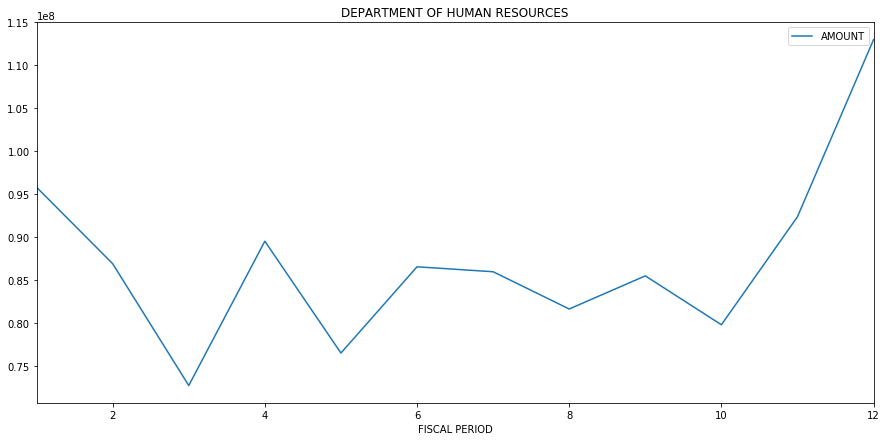

In [15]:
ms = ms[ms['DEPARTMENT']==chkdept]
print(ms)
ms.plot(x='FISCAL PERIOD', y='AMOUNT', kind='line', figsize=(15,7), title=chkdept)
plt.show

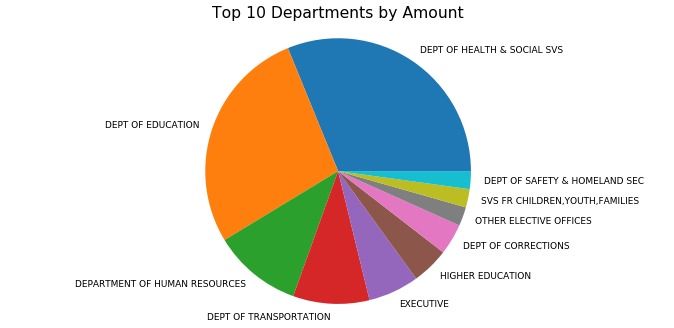

In [16]:
figure(num=None, figsize=(13, 6), dpi=65)

# Data to plot
labels = dep['DEPARTMENT'].head(10)
sizes = dep['AMOUNT'].head(10)
 
# Plot
plt.title('Top 10 Departments by Amount',size='xx-large')
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()

In [17]:
# Show totals for years (excluding current incomplete year)
grouped = data[data['FISCAL YEAR']<2020]
grouped = grouped.groupby(['FISCAL YEAR'])['AMOUNT'].sum().reset_index()
grouped = grouped.sort_values(['FISCAL YEAR','AMOUNT'], ascending=False)
grouped


,FISCAL YEAR,AMOUNT
5,2019,"$10,724,651,822.17"
4,2018,"$10,237,541,933.48"
3,2017,"$9,991,419,207.58"
2,2016,"$9,607,047,613.51"
1,2015,"$9,238,980,510.83"
0,2014,"$9,018,777,805.87"


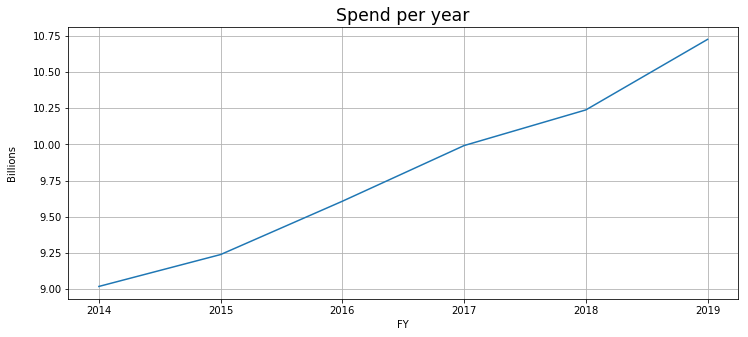

In [18]:
# Display a plot of annual spend 
plt.figure(figsize=(12,5))
plt.title('Spend per year',size='xx-large')
plt.xlabel('FY')
plt.ylabel('Billions\n')
plt.grid(True)
plt.xticks(grouped['FISCAL YEAR'])
plt.plot(grouped['FISCAL YEAR'],grouped['AMOUNT']/1000000000)

In [19]:
#2019 - Big ticket items by vendor
grouped = data[data['FISCAL YEAR']==2019]
grouped = grouped.groupby(['FISCAL YEAR','VENDOR','CATEGORY'])['AMOUNT'].sum().reset_index()
grouped = grouped.sort_values(['FISCAL YEAR','AMOUNT'], ascending=False)
grouped.head(15)

,FISCAL YEAR,VENDOR,CATEGORY,AMOUNT
18272,2019,DXC TECHNOLOGY SERVICES LLC,MEDFAC EXPENSES,"$2,189,092,291.92"
19810,2019,EMPLOYEE COMPENSATION,SALARIES/WAGES-EMPLOYEES,"$765,760,837.45"
19832,2019,EMPLOYEE COMPENSATION,TEACHERS,"$671,461,068.15"
43085,2019,OTHER EMPLOYMENT COSTS BENEFITS,PENSIONS/EMPLOYER'S SHARE,"$512,573,226.68"
24930,2019,HIGHMARK HEALTH SERVICES,MEDICAL - EMPLOYER,"$464,972,193.68"
43082,2019,OTHER EMPLOYMENT COSTS BENEFITS,HEALTH INS/EMPLOYERS' SH,"$461,328,836.23"
42407,2019,NORTHERN TRUST COMPANY,INVESTMENTS,"$335,482,427.59"
38254,2019,MEDCO HEALTH SOLUTIONS INC,MEDICAL - EMPLOYER,"$271,220,915.35"
913,2019,AETNA,MEDICAL - EMPLOYER,"$160,296,522.61"
57398,2019,UNIVERSITY OF DELAWARE,GRANTS,"$134,599,059.66"


In [20]:
#2019 - Big ticket items by category for 2019
grouped = data[data['FISCAL YEAR']==2019]
grouped = grouped.groupby(['FISCAL YEAR','CATEGORY'])['AMOUNT'].sum().reset_index()
grouped = grouped.sort_values(['FISCAL YEAR','AMOUNT'], ascending=False)
grouped = grouped.head(15)
grouped

,FISCAL YEAR,CATEGORY,AMOUNT
229,2019,MEDFAC EXPENSES,"$2,229,168,840.21"
231,2019,MEDICAL - EMPLOYER,"$943,425,963.04"
333,2019,SALARIES/WAGES-EMPLOYEES,"$765,760,837.45"
381,2019,TEACHERS,"$671,461,068.15"
277,2019,PENSIONS/EMPLOYER'S SHARE,"$512,573,226.68"
261,2019,OTHER PROFESSIONAL SERVICE,"$479,224,347.35"
175,2019,HEALTH INS/EMPLOYERS' SH,"$461,328,836.23"
201,2019,INVESTMENTS,"$335,482,427.59"
168,2019,GRANTS,"$245,590,372.01"
179,2019,HGWY/BRIDGE RECONSTR,"$243,926,934.62"


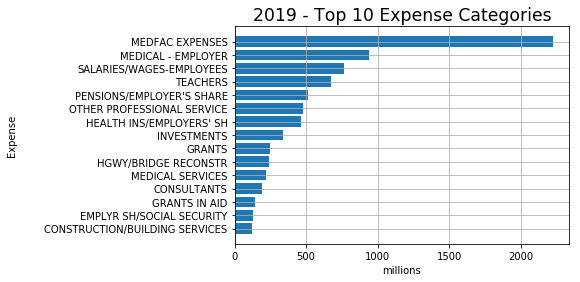

In [21]:
# Bar chart of top 15 expenses for 2019
grouped = grouped.sort_values(['FISCAL YEAR','AMOUNT'], ascending=True)
plt.figure()
plt.title('2019 - Top 10 Expense Categories',size='xx-large')
plt.xlabel('millions')
plt.ylabel('Expense\n\n')
plt.grid(True)
plt.barh(grouped['CATEGORY'],grouped['AMOUNT']/1000000)
plt.show()

In [22]:
# Show FY19 Deparment Spend by Category 
dep = data[data['DEPARTMENT']==chkdept] 
dep = dep[dep['FISCAL YEAR']==2019]
dep = dep.groupby(['CATEGORY'])['AMOUNT'].sum().reset_index()
dep = dep.sort_values('AMOUNT', ascending=False)
dep.head(20)

,CATEGORY,AMOUNT
36,MEDICAL - EMPLOYER,"$943,420,696.96"
67,WORKER'S COMP,"$35,900,000.00"
21,EMPLOYEE W/H - DENTAL,"$14,917,034.57"
7,CLAIM PAYMENTS,"$14,268,075.22"
19,EMPLOYEE GROUP LIFE INS W/H,"$8,745,390.66"
54,SALARIES/WAGES-EMPLOYEES,"$5,797,683.71"
16,EMPLOYEE 125 HEALTH CARE (ODD),"$4,172,813.67"
15,EMPLOYEE 125 HEALTH CARE (EVEN,"$3,632,434.97"
32,INSURANCE,"$3,495,086.50"
65,VISION PLAN - SBO,"$2,205,385.83"


In [23]:
# Show FY19 Department Spend by Vendor 
dep = data[data['DEPARTMENT']==chkdept]
dep = dep[dep['FISCAL YEAR']==2019]
dep = dep.groupby(['DIVISION', 'VENDOR'])['AMOUNT'].sum().reset_index()
dep = dep.sort_values('AMOUNT', ascending=False)
dep = dep.head(50)
print(dep.to_string())

                            DIVISION                                    VENDOR          AMOUNT
43    DIVISION OF STATEWIDE BENEFITS                  HIGHMARK HEALTH SERVICES $464,972,193.68
47    DIVISION OF STATEWIDE BENEFITS                MEDCO HEALTH SOLUTIONS INC $271,220,915.35
14    DIVISION OF STATEWIDE BENEFITS                                     AETNA $160,296,522.61
54    DIVISION OF STATEWIDE BENEFITS                    OMB OFFICE OF PENSIONS  $44,995,487.58
481   INSUR COVERAGE OFFICE OF M & B          INSURANCE COVERAGE OFFICE OF M&B  $35,953,208.76
28    DIVISION OF STATEWIDE BENEFITS                    DELTA DENTAL OF DE INC  $13,663,323.15
18    DIVISION OF STATEWIDE BENEFITS                        CENTRAL TRUST BANK  $11,405,778.41
49    DIVISION OF STATEWIDE BENEFITS               MINNESOTA LIFE INSURANCE CO   $8,745,390.66
236   INSUR COVERAGE OFFICE OF M & B               CONNER STRONG COMPANIES INC   $3,482,588.50
912   INSUR COVERAGE OFFICE OF M & B              

In [24]:
# Show FY19 Department Spend by Division
dep = data[data['DEPARTMENT']==chkdept]
dep = dep[dep['FISCAL YEAR']==2019]
dep = dep.groupby(['DIVISION'])['AMOUNT'].sum().reset_index()
dep = dep.sort_values('AMOUNT', ascending=False)
print(dep.to_string())

                         DIVISION          AMOUNT
3  DIVISION OF STATEWIDE BENEFITS $983,682,808.66
4  INSUR COVERAGE OFFICE OF M & B  $54,405,951.87
5         OFFICE OF THE SECRETARY   $2,786,354.29
2  DIVISION OF PERSONNEL MANAGEME   $1,846,293.53
0  DIVISION OF DIVERSITY AND INCL   $1,244,972.22
7  STAFF DEVELOPMENT AND TRAINING   $1,151,647.18
1  DIVISION OF LABOR RELATIONS AN     $790,616.17
6   OFFICE OF WOMEN'S ADVANCEMENT     $357,545.29
